<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_NaiveBayes_GuassianMultinomialNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes Classification 

Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

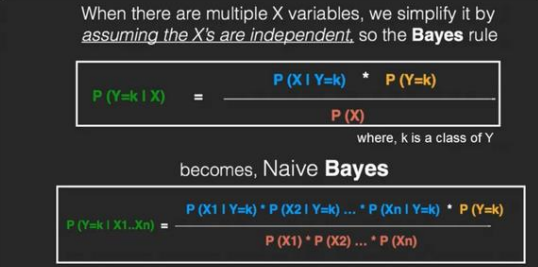

In [11]:
#import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB

##GuassianNB - Binomial Classification

In [2]:
df=pd.read_csv('/content/PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


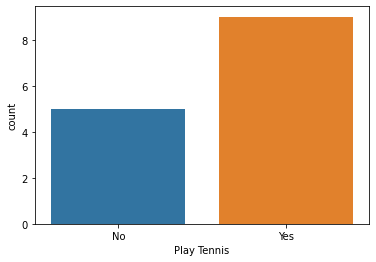

In [3]:
sns.countplot(data=df,x='Play Tennis')

Conclusion :

    We can observe unbalanced data. 

In [4]:
#Encoding categorical values
le=LabelEncoder()
df['Play Tennis']=le.fit_transform(df['Play Tennis'])
df['Outlook']=le.fit_transform(df['Outlook'])
df['Wind']=le.fit_transform(df['Wind'])
df['Humidity']=le.fit_transform(df['Humidity'])

df['Temperature'] = df['Temperature'].map({"Hot" :0, "Mild":1, "Cool":2})

Conclusion :

    Encoded feature values using LabelEncoder and mapping technique for ordinal categorical data.

In [5]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,1,0,1,1
4,1,2,1,1,1


###Fit model and predict values

In [6]:
x=df.drop(columns="Play Tennis")
y=df['Play Tennis']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8,random_state=0)

In [7]:
model=GaussianNB()
model.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

###Evaluate classification model plot ROC_AUC 

In [8]:
ypred=model.predict(xtest)
ypred_prob=model.predict_proba(xtest)
ypred_prob=ypred_prob[:,1]
ypred_prob

array([0.87398535, 0.99848375, 0.9713444 , 0.96547405, 0.98032024,
       0.30950693, 0.95208571, 0.04841231, 0.2275099 , 0.55870496,
       0.59006672, 0.14043144])

In [14]:
demo_pred=model.predict([[2,2,0,1]])
demo_pred

array([0])

Accuracy : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



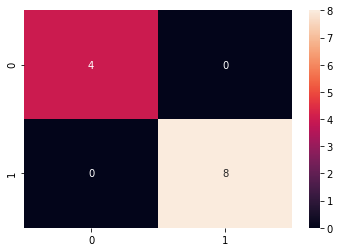

In [9]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

In [12]:
#roc curve for models
fpr, tpr, thresh1 = roc_curve(ytest, ypred_prob)
auc=roc_auc_score(ytest,ypred_prob)
print("AUC : ",auc)

AUC :  1.0


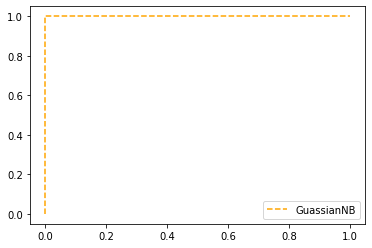

In [13]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='GuassianNB')
plt.legend()

Conclusion : 

    100% accuract gives such kind of ROC plot.

##MultinomialNB - Multinomial Classification

In [15]:
df = pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
#Transform feature variables into categorical features
#df['petal_length'].astype(int).unique()
#df['sepal_length'].astype(int).unique()
#df['petal_width'].astype(int).unique()
#df['sepal_width'].astype(int).unique()

df['petal_length'] = df['petal_length'].astype(int)
df['sepal_length']= df['sepal_length'].astype(int)
df['petal_width'] = df['petal_width'].astype(int)
df['sepal_width'] = df['sepal_width'].astype(int)

df['species']=le.fit_transform(df['species'])

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0


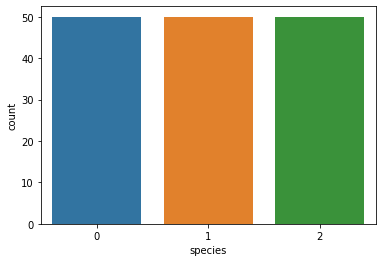

In [27]:
sns.countplot(data=df,x='species')

###Fit model and predict target

In [28]:
x=df.drop(columns="species")
y=df['species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=0)

In [29]:
model=MultinomialNB()
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###Evaluate model and plot ROC_AUC

In [32]:
ypred=model.predict(xtest)
ypred_prob=model.predict_proba(xtest)
ypred_prob[:5,:]

array([[2.90324438e-05, 4.13285660e-01, 5.86685307e-01],
       [4.04784679e-03, 5.20352362e-01, 4.75599792e-01],
       [9.03507642e-01, 6.47696896e-02, 3.17226686e-02],
       [7.09237043e-04, 4.97950285e-01, 5.01340478e-01],
       [8.26716871e-01, 1.12872876e-01, 6.04102527e-02]])

Accuracy : 0.8666666666666667
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      0.87      0.83        23
           2       0.84      0.76      0.80        21

    accuracy                           0.87        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.87      0.87      0.87        60



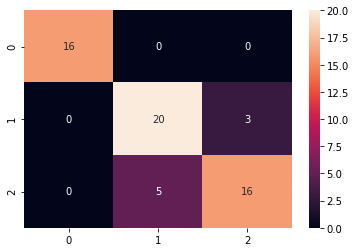

In [33]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

In [34]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[str(i)], tpr[str(i)], thresh[str(i)] = roc_curve(ytest, ypred_prob[:,i],pos_label=i)



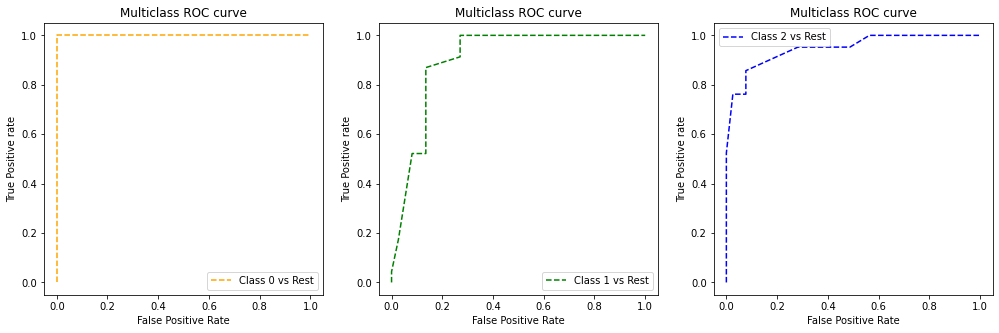

In [35]:
# plotting    
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(fpr[str(0)], tpr[str(0)], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.plot(fpr[str(1)], tpr[str(1)], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.plot(fpr[str(2)], tpr[str(2)], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')